In [33]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

sys.path.insert(0, os.path.abspath('..\\..'))
cpath = sys.path[0]
print(cpath)

D:\Programming\DataScience\MasterDS\Multimodal\SemesterProject\ennIO


In [34]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [35]:
video_ftrs = pickle.load(open(os.path.join(cpath,"data\\video_features_df_{ftlist_[lbps,hogs,colors,flow],width_300,step_3}.pkl"), "rb"))
audio_ftrs = pickle.load(open(os.path.join(cpath,"data\\audio_features_df_{mid_window_5.0,mid_step_0.5,short_window_1.0,short_step_0.5}.pkl"), "rb"))
metada_ftrs = pickle.load(open(os.path.join(cpath,"data\\metadata_df.pkl"), "rb"))

In [36]:
print("video_shape:", video_ftrs.shape)
print("audio_shape:", audio_ftrs.shape)
print("metadata_shape:", metada_ftrs.shape)

video_shape: (994, 708)
audio_shape: (994, 70)
metadata_shape: (994, 6)


In [5]:
audio_ftrs.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,chroma_6_std,chroma_7_std,chroma_8_std,chroma_9_std,chroma_10_std,chroma_11_std,chroma_12_std,chroma_std_std,beat,beat_conf
d0a799871ac7565466156e1ceb85a6ed,0.045434,0.014248,2.886813,0.146830,0.169952,0.284097,0.000263,0.021182,-21.256107,2.314035,...,0.001172,0.001056,0.020364,0.000418,0.000597,0.000394,0.001420,0.005620,30.0,0.666667
b8f8c5cdff922f0394e1f5c226cd5942,0.048627,0.009900,2.813025,0.127578,0.163382,0.239903,0.000251,0.030749,-20.978820,2.130873,...,0.001854,0.013264,0.013089,0.006552,0.001257,0.000813,0.001420,0.004195,30.0,1.000000
35e0195108cb6ec499b57d1772d75963,0.070627,0.010377,3.096500,0.143139,0.153180,0.702480,0.000132,0.125177,-19.614830,1.511255,...,0.002022,0.000974,0.001322,0.000771,0.001478,0.002335,0.001160,0.000741,30.0,1.000000
3591152fbb3ae5c24449e5f0bc708d7c,0.072511,0.012543,2.887230,0.126836,0.137028,0.623792,0.000172,0.110195,-19.379394,1.359259,...,0.001436,0.001791,0.001541,0.001380,0.001165,0.002868,0.001121,0.001213,40.0,0.571429
01e1a8ee0762cd07e82d6a8ae628064a,0.080269,0.010170,3.097013,0.140253,0.141215,0.834588,0.000129,0.133144,-19.463461,1.008061,...,0.000878,0.001480,0.000573,0.000828,0.000828,0.000328,0.000914,0.000338,40.0,0.571429


In [58]:
audio_ftrs.describe()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,chroma_6_std,chroma_7_std,chroma_8_std,chroma_9_std,chroma_10_std,chroma_11_std,chroma_12_std,chroma_std_std,beat,beat_conf
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,957.000000
mean,0.045502,0.032229,3.128646,0.105692,0.132219,0.328193,0.000554,0.063965,-19.737197,1.855745,...,0.002129,0.001570,0.001619,0.001670,0.001261,0.001524,0.001237,0.001702,39.285714,0.732026
std,0.020017,0.021418,0.131423,0.035271,0.027938,0.243230,0.000559,0.036547,1.595673,0.776657,...,0.003011,0.002199,0.002011,0.003051,0.001720,0.001939,0.001650,0.002138,18.671724,0.201187
min,0.008985,0.001157,2.243405,0.033924,0.074668,0.001099,0.000000,0.005176,-25.419699,-0.907484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.333333
25%,0.030740,0.019638,3.069839,0.079955,0.111493,0.128893,0.000195,0.036378,-20.766551,1.395046,...,0.000695,0.000547,0.000591,0.000537,0.000473,0.000530,0.000435,0.000743,30.000000,0.571429
50%,0.043927,0.028572,3.161962,0.104651,0.130678,0.300242,0.000327,0.056776,-19.470825,1.780512,...,0.001207,0.000961,0.001083,0.000955,0.000849,0.000972,0.000801,0.001148,30.000000,0.714286
75%,0.058403,0.039325,3.221262,0.127462,0.148497,0.468252,0.000694,0.083910,-18.547617,2.234794,...,0.002198,0.001743,0.001883,0.001735,0.001497,0.001851,0.001345,0.001966,40.000000,1.000000
max,0.167614,0.187188,3.313892,0.250449,0.233052,1.550149,0.004087,0.255448,-15.927440,5.111810,...,0.030628,0.030530,0.020833,0.050864,0.031685,0.022733,0.017876,0.029806,120.000000,1.000000


In [6]:
video_ftrs.head()

,Color-R0,Color-R1,Color-R2,Color-R3,Color-R4,Color-R5,Color-R6,Color-R7,Color-R8,Color-R9,...,HOG120_std,HOG121_std,HOG122_std,HOG123_std,HOG124_std,HOG125_std,HOG126_std,HOG127_std,m_std,s_std
d0a799871ac7565466156e1ceb85a6ed,0.719110,0.136289,0.063142,0.030580,0.017078,0.010130,0.008149,0.004567,0.002936,0.001913,...,0.184722,0.053541,0.059992,0.108253,0.108253,0.068938,0.126909,0.189481,128.360182,44.210998
b8f8c5cdff922f0394e1f5c226cd5942,0.662056,0.163225,0.085626,0.038802,0.020118,0.013092,0.005503,0.002727,0.001780,0.001026,...,0.113477,0.026190,0.108758,0.057320,0.057320,0.131560,0.059790,0.133654,143.312763,13.846482
35e0195108cb6ec499b57d1772d75963,0.159839,0.331018,0.060159,0.076480,0.083291,0.075312,0.079592,0.047103,0.034011,0.021056,...,0.194728,0.113697,0.057675,0.251652,0.152858,0.066851,0.157781,0.180492,111.578723,34.822410
3591152fbb3ae5c24449e5f0bc708d7c,0.096171,0.318301,0.086576,0.099630,0.095517,0.086692,0.087103,0.052281,0.029549,0.019985,...,0.162341,0.106328,0.080494,0.117433,0.094813,0.113793,0.121685,0.143244,87.280014,36.666677
01e1a8ee0762cd07e82d6a8ae628064a,0.047312,0.315714,0.091096,0.093613,0.069909,0.062760,0.060326,0.069826,0.068673,0.052751,...,0.121159,0.091433,0.131293,0.090999,0.098832,0.179773,0.119407,0.162416,124.714636,30.027139


In [7]:
metada_ftrs.head()

,Title,Url,Video file path,Audio file path,Mismatch Title,Mismatch URL
d0a799871ac7565466156e1ceb85a6ed,title_Crazy_Stupid_Love_-_The_Big_Move-id_9vSK...,https://www.youtube.com/watch?v=9vSKyFA5F9Y,data\downloads\parsed\video\title_Crazy_Stupid...,data\downloads\parsed\audio\title_Crazy_Stupid...,300,https://www.youtube.com/watch?v=5okHkftNTqM
b8f8c5cdff922f0394e1f5c226cd5942,title_Crazy_Stupid_Love_-_The_Big_Move-id_9vSK...,https://www.youtube.com/watch?v=9vSKyFA5F9Y,data\downloads\parsed\video\title_Crazy_Stupid...,data\downloads\parsed\audio\title_Crazy_Stupid...,300,https://www.youtube.com/watch?v=5okHkftNTqM
35e0195108cb6ec499b57d1772d75963,title_Dracula_dead_and_loving_it-id_XQtDFTUm37...,https://www.youtube.com/watch?v=XQtDFTUm370,data\downloads\parsed\video\title_Dracula_dead...,data\downloads\parsed\audio\title_Dracula_dead...,Baywatch,https://www.youtube.com/watch?v=WDuIl_uPY_s
3591152fbb3ae5c24449e5f0bc708d7c,title_Dracula_dead_and_loving_it-id_XQtDFTUm37...,https://www.youtube.com/watch?v=XQtDFTUm370,data\downloads\parsed\video\title_Dracula_dead...,data\downloads\parsed\audio\title_Dracula_dead...,Baywatch,https://www.youtube.com/watch?v=WDuIl_uPY_s
01e1a8ee0762cd07e82d6a8ae628064a,title_Dracula_dead_and_loving_it-id_XQtDFTUm37...,https://www.youtube.com/watch?v=XQtDFTUm370,data\downloads\parsed\video\title_Dracula_dead...,data\downloads\parsed\audio\title_Dracula_dead...,Baywatch,https://www.youtube.com/watch?v=WDuIl_uPY_s


In [8]:
def my_train_test_split(percentage, df=metada_ftrs):
    train_idx_list = list()
    test_idx_list = list()
    train_url_list = list()
    test_url_list = list()

    original_list_of_indexes = list(df.index.values)
    list_of_urls = list(metada_ftrs['Url'].values)
    unique_urls = set(list_of_urls)

    total_items, _ = df.shape
    required_test_items = np.round(percentage*total_items)
    required_train_items = total_items - required_test_items

    while len(test_idx_list)<required_test_items:
        #select random item
        item_idx = random.choice(original_list_of_indexes)
        item_url = df.at[item_idx,"Url"]
        if item_url not in test_url_list:
            test_url_list.append(item_url)
            test_idx_list.extend(list(df.index[df['Url'] == item_url]))

    train_idx_list = [x for x in original_list_of_indexes if x not in test_idx_list]

    return train_idx_list, test_idx_list
        
    

In [9]:
#audio_ftrs = audio_ftrs.fillna(value =0)
audio_ftrs_proc = audio_ftrs.drop(['beat_conf'], axis=1)

In [10]:
print("video_shape:", video_ftrs.shape)
print("processed audio_shape:", audio_ftrs_proc.shape)

video_shape: (994, 708)
processed audio_shape: (994, 69)


In [11]:
x_data = video_ftrs.values
y_data = audio_ftrs_proc.values

In [12]:
print(x_data.shape)
print(y_data.shape)

(994, 708)
(994, 69)


In [13]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
x_scaler.fit(x_data)
y_scaler.fit(y_data)
x_data_scld = x_scaler.transform(x_data)
y_data_scld = y_scaler.transform(y_data)

In [14]:
def custom_train_test_split(v_ftrs, a_ftrs, test_size, x_scl, y_scl, random_state):
    random.seed(random_state)
    train_list, test_list = my_train_test_split(test_size)
    x_train_df = v_ftrs.loc[train_list]
    y_train_df = a_ftrs.loc[train_list]
    x_test_df = v_ftrs.loc[test_list]
    y_test_df = a_ftrs.loc[test_list]
    
    x_train_df.head()
    
    x_train_vls = x_train_df.values
    y_train_vls= y_train_df.values
    x_test_vls = x_test_df.values
    y_test_vls = y_test_df.values
    
    x_train = x_scl.transform(x_train_vls)
    y_train = y_scl.transform(y_train_vls)
    x_test = x_scl.transform(x_test_vls)
    y_test = y_scl.transform(y_test_vls)

    return x_train, x_test, y_train, y_test



In [15]:
x_train, x_test, y_train, y_test = custom_train_test_split(video_ftrs, audio_ftrs_proc, 0.20,  x_scaler, y_scaler, random_state=42)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop
import tensorflow as tf
from keras import regularizers

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

#tf.Session(config=tf.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True))

Using TensorFlow backend.


In [17]:
#TO DO:
# Remove Regularization
# Different number of layers
# Different number of nodes
# Different activation functions
# Different optimizers

#### Regularization
# Different batch_size
# Add Regularization

Different Number of Layers

In [18]:
# 5 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               141800    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 1s 1ms/step -

Test loss: 0.4752874779701233
dict_keys(['val_loss', 'loss'])


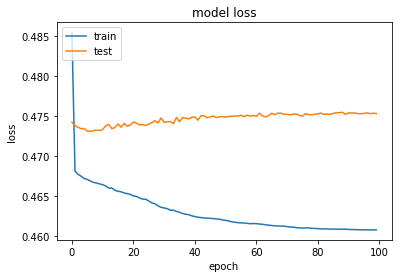

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [20]:
# 4 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               141800    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 69)                13869     
Total params: 236,069
Trainable params: 236,069
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 195us/step - loss: 0.4887 - val_loss: 0.4741
Epoch 2/100
794/794 [==============================] - 0s 59us/step - loss: 0.4672 - val_loss: 0.

Test loss: 0.4746520805358887
dict_keys(['val_loss', 'loss'])


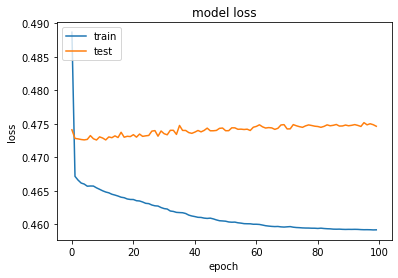

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# 3 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_12 (Dense)             (None, 69)                13869     
Total params: 195,869
Trainable params: 195,869
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 161us/step - loss: 0.5109 - val_loss: 0.4756
Epoch 2/100
794/794 [==============================] - 0s 54us/step - loss: 0.4698 - val_loss: 0.4741
Epoch 3/100
794/794 [==============================] - 0s 55us/step - loss: 0.4691 - val_loss: 0.4740
Epoch 4/100
794/794 [====

Epoch 73/100
794/794 [==============================] - 0s 53us/step - loss: 0.4658 - val_loss: 0.4748
Epoch 74/100
794/794 [==============================] - 0s 54us/step - loss: 0.4657 - val_loss: 0.4751
Epoch 75/100
794/794 [==============================] - 0s 60us/step - loss: 0.4656 - val_loss: 0.4753
Epoch 76/100
794/794 [==============================] - 0s 54us/step - loss: 0.4656 - val_loss: 0.4750
Epoch 77/100
794/794 [==============================] - 0s 52us/step - loss: 0.4656 - val_loss: 0.4749
Epoch 78/100
794/794 [==============================] - 0s 52us/step - loss: 0.4655 - val_loss: 0.4748
Epoch 79/100
794/794 [==============================] - 0s 50us/step - loss: 0.4654 - val_loss: 0.4752
Epoch 80/100
794/794 [==============================] - 0s 55us/step - loss: 0.4652 - val_loss: 0.4747
Epoch 81/100
794/794 [==============================] - 0s 57us/step - loss: 0.4650 - val_loss: 0.4749
Epoch 82/100
794/794 [==============================] - 0s 60us/step - lo

Test loss: 0.4750229358673096
dict_keys(['val_loss', 'loss'])


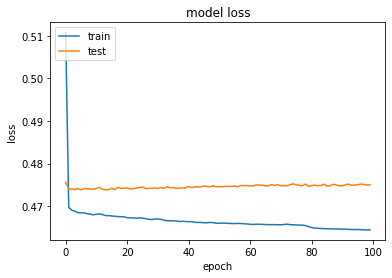

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# 2 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_15 (Dense)             (None, 69)                13869     
Total params: 195,869
Trainable params: 195,869
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 167us/step - loss: 0.5015 - val_loss: 0.4741
Epoch 2/100
794/794 [==============================] - 0s 55us/step - loss: 0.4682 - val_loss: 0.4736
Epoch 3/100
794/794 [==============================] - 0s 58us/step - loss: 0.4674 - val_loss: 0.4739
Epoch 4/100
794/794 [====

Epoch 73/100
794/794 [==============================] - 0s 55us/step - loss: 0.4618 - val_loss: 0.4751
Epoch 74/100
794/794 [==============================] - 0s 54us/step - loss: 0.4618 - val_loss: 0.4751
Epoch 75/100
794/794 [==============================] - 0s 53us/step - loss: 0.4618 - val_loss: 0.4751
Epoch 76/100
794/794 [==============================] - 0s 54us/step - loss: 0.4618 - val_loss: 0.4753
Epoch 77/100
794/794 [==============================] - 0s 55us/step - loss: 0.4618 - val_loss: 0.4753
Epoch 78/100
794/794 [==============================] - 0s 54us/step - loss: 0.4618 - val_loss: 0.4752
Epoch 79/100
794/794 [==============================] - 0s 53us/step - loss: 0.4618 - val_loss: 0.4750
Epoch 80/100
794/794 [==============================] - 0s 54us/step - loss: 0.4618 - val_loss: 0.4751
Epoch 81/100
794/794 [==============================] - 0s 55us/step - loss: 0.4618 - val_loss: 0.4754
Epoch 82/100
794/794 [==============================] - 0s 54us/step - lo

Test loss: 0.4752716636657715
dict_keys(['val_loss', 'loss'])


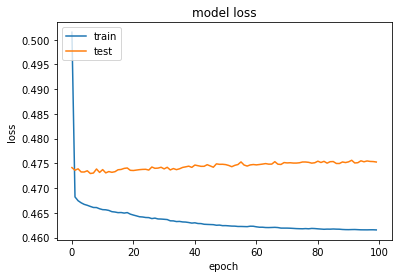

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# 6 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_19 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_20 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_21 (Dense)             (None, 69)                13869     
Total params: 316,469
Trainable params: 316,469
Non-trainable params: 0
________________________________________________

794/794 [==============================] - 0s 72us/step - loss: 0.4607 - val_loss: 0.4753
Epoch 70/100
794/794 [==============================] - 0s 82us/step - loss: 0.4607 - val_loss: 0.4750
Epoch 71/100
794/794 [==============================] - 0s 81us/step - loss: 0.4607 - val_loss: 0.4752
Epoch 72/100
794/794 [==============================] - 0s 69us/step - loss: 0.4607 - val_loss: 0.4752
Epoch 73/100
794/794 [==============================] - 0s 68us/step - loss: 0.4607 - val_loss: 0.4753
Epoch 74/100
794/794 [==============================] - 0s 72us/step - loss: 0.4607 - val_loss: 0.4753
Epoch 75/100
794/794 [==============================] - 0s 68us/step - loss: 0.4607 - val_loss: 0.4756
Epoch 76/100
794/794 [==============================] - 0s 67us/step - loss: 0.4607 - val_loss: 0.4755
Epoch 77/100
794/794 [==============================] - 0s 69us/step - loss: 0.4607 - val_loss: 0.4757
Epoch 78/100
794/794 [==============================] - 0s 69us/step - loss: 0.4607 - 

Test loss: 0.47507778167724607
dict_keys(['val_loss', 'loss'])


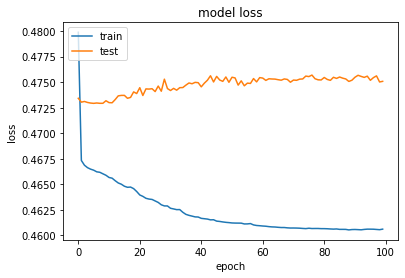

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [28]:
# 7 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_23 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_24 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_25 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_26 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_27 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_28 (Dense)             (None, 69)               

Test loss: 0.4751594853401184
dict_keys(['val_loss', 'loss'])


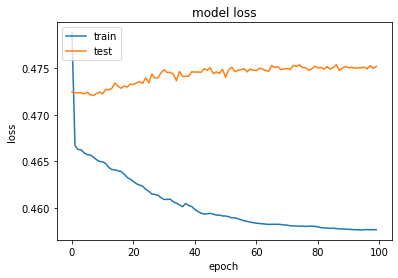

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [30]:
# 8 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_30 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_31 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_32 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_33 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_34 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_35 (Dense)             (None, 200)              

Test loss: 0.47467520713806155
dict_keys(['val_loss', 'loss'])


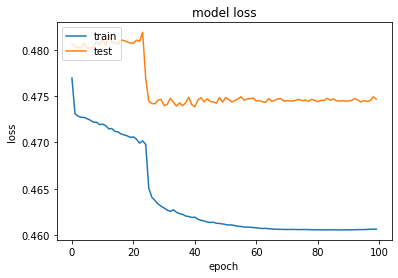

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [32]:
# 9 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_38 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_39 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_40 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_41 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_42 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_43 (Dense)             (None, 200)              

Test loss: 0.474459068775177
dict_keys(['val_loss', 'loss'])


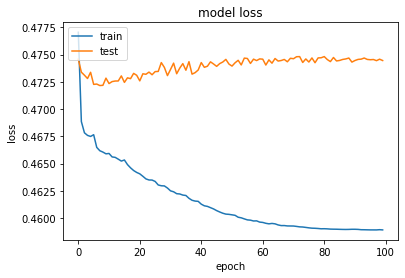

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [34]:
# 10 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_47 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_48 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_49 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_50 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_51 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_52 (Dense)             (None, 200)              

Epoch 64/100
794/794 [==============================] - 0s 82us/step - loss: 0.4600 - val_loss: 0.4744
Epoch 65/100
794/794 [==============================] - 0s 83us/step - loss: 0.4600 - val_loss: 0.4741
Epoch 66/100
794/794 [==============================] - 0s 80us/step - loss: 0.4600 - val_loss: 0.4743
Epoch 67/100
794/794 [==============================] - 0s 87us/step - loss: 0.4599 - val_loss: 0.4742
Epoch 68/100
794/794 [==============================] - 0s 87us/step - loss: 0.4599 - val_loss: 0.4743
Epoch 69/100
794/794 [==============================] - 0s 84us/step - loss: 0.4599 - val_loss: 0.4744
Epoch 70/100
794/794 [==============================] - 0s 87us/step - loss: 0.4599 - val_loss: 0.4747
Epoch 71/100
794/794 [==============================] - 0s 84us/step - loss: 0.4598 - val_loss: 0.4745
Epoch 72/100
794/794 [==============================] - 0s 82us/step - loss: 0.4598 - val_loss: 0.4743
Epoch 73/100
794/794 [==============================] - 0s 80us/step - lo

Test loss: 0.47426007747650145
dict_keys(['val_loss', 'loss'])


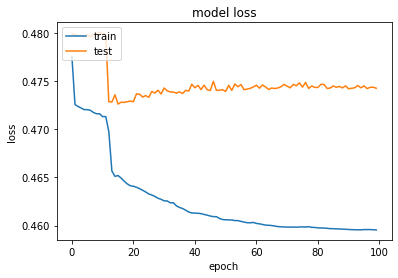

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [36]:
# 15 Layers
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_57 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_58 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_59 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_60 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_61 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_62 (Dense)             (None, 200)             

Epoch 57/100
794/794 [==============================] - 0s 106us/step - loss: 0.4640 - val_loss: 0.4735
Epoch 58/100
794/794 [==============================] - 0s 105us/step - loss: 0.4639 - val_loss: 0.4739
Epoch 59/100
794/794 [==============================] - 0s 107us/step - loss: 0.4639 - val_loss: 0.4736
Epoch 60/100
794/794 [==============================] - 0s 104us/step - loss: 0.4638 - val_loss: 0.4732
Epoch 61/100
794/794 [==============================] - 0s 103us/step - loss: 0.4638 - val_loss: 0.4733
Epoch 62/100
794/794 [==============================] - 0s 107us/step - loss: 0.4639 - val_loss: 0.4730
Epoch 63/100
794/794 [==============================] - 0s 102us/step - loss: 0.4639 - val_loss: 0.4734
Epoch 64/100
794/794 [==============================] - 0s 102us/step - loss: 0.4639 - val_loss: 0.4734
Epoch 65/100
794/794 [==============================] - 0s 107us/step - loss: 0.4639 - val_loss: 0.4739
Epoch 66/100
794/794 [==============================] - 0s 103us

Test loss: 0.47360978841781615
dict_keys(['val_loss', 'loss'])


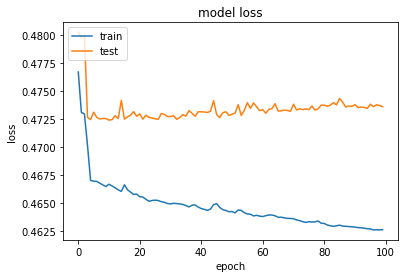

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test node number

In [55]:
nodes = [100, 200, 300, 400, 500]

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 100)               70900     
_________________________________________________________________
dense_107 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_108 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_109 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_110 (Dense)            (None, 69)                6969      
Total params: 108,169
Trainable params: 108,169
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 205us/ste

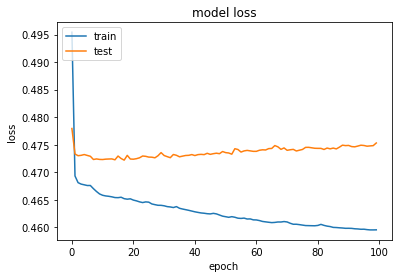

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_112 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_113 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_114 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_115 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 210us/ste

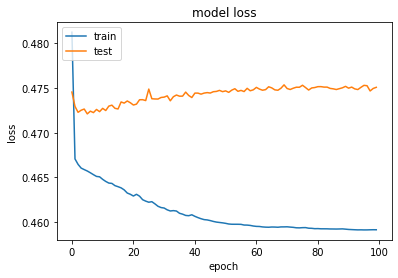

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 300)               212700    
_________________________________________________________________
dense_117 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_118 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_119 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_120 (Dense)            (None, 69)                20769     
Total params: 504,369
Trainable params: 504,369
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 211us/ste

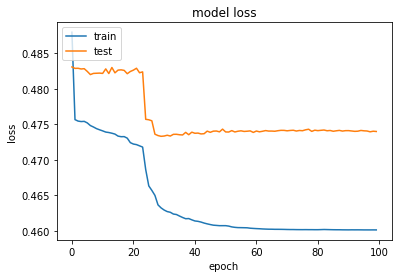

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 400)               283600    
_________________________________________________________________
dense_122 (Dense)            (None, 400)               160400    
_________________________________________________________________
dense_123 (Dense)            (None, 400)               160400    
_________________________________________________________________
dense_124 (Dense)            (None, 400)               160400    
_________________________________________________________________
dense_125 (Dense)            (None, 69)                27669     
Total params: 792,469
Trainable params: 792,469
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 219us/ste

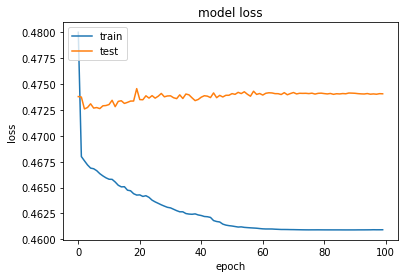

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 500)               354500    
_________________________________________________________________
dense_127 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_128 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_129 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_130 (Dense)            (None, 69)                34569     
Total params: 1,140,569
Trainable params: 1,140,569
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 220us

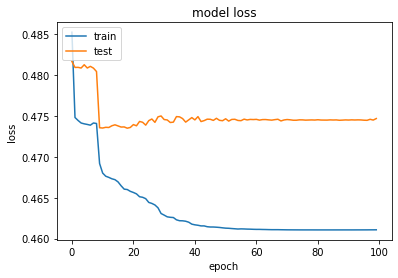

In [57]:
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100

for nd in nodes:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(nd, activation=act_func, input_shape=(708,)))
    model.add(Dense(nd, activation=act_func))
    model.add(Dense(nd, activation=act_func))
    model.add(Dense(nd, activation=act_func))
    model.add(Dense(num_outputs, activation=act_func))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=Adam())

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("Number of nodes:", nd)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_172 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_173 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_174 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_175 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 211us/ste

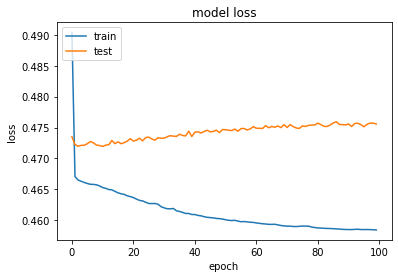

In [61]:
# 5 Layers variable size of nodes
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100
   
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func))
model.add(Dense(200, activation=act_func))
model.add(Dense(100, activation=act_func))
model.add(Dense(num_outputs, activation=act_func))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)
#print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Different activation functions

In [39]:
activations = ['relu', 'softplus', 'tanh', 'sigmoid']

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_152 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_153 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_154 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_155 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 206us/ste

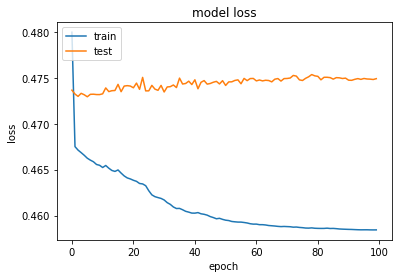

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_157 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_158 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_159 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_160 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 211us/ste

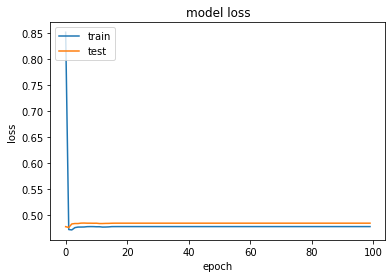

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_162 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_163 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_164 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_165 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 210us/ste

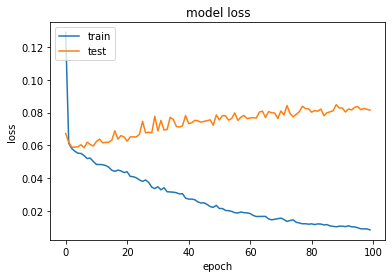

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_167 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_168 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_169 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_170 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 211us/ste

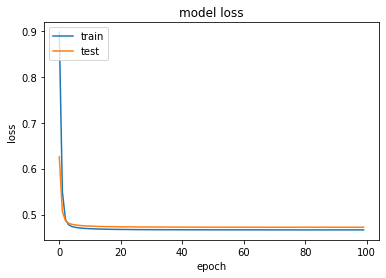

In [60]:
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100

for act_func in activations:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(num_outputs, activation=act_func))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=Adam())

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("Activation Function:", act_func)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_72 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_73 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_74 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_75 (Dense)             (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 211us/ste

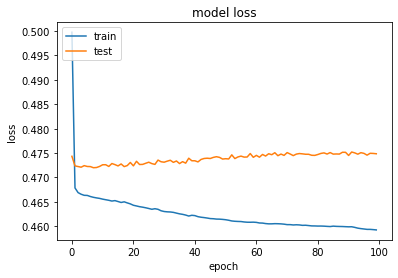

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_77 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_78 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_79 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_80 (Dense)             (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 212us/ste

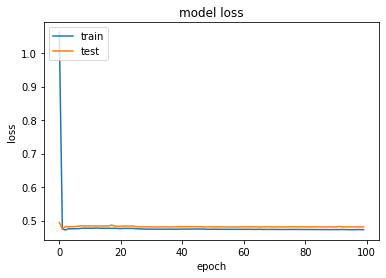

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_82 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_83 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_84 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_85 (Dense)             (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 226us/ste

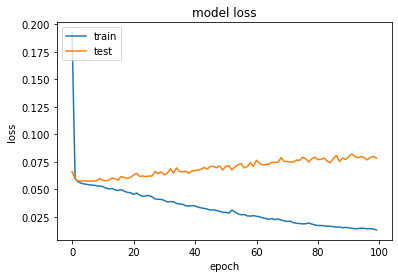

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_87 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_88 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_89 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_90 (Dense)             (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 219us/ste

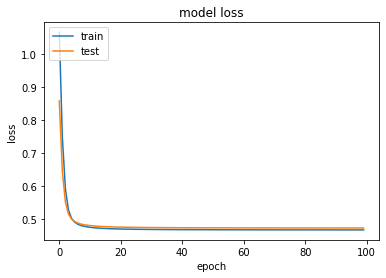

In [40]:
num_outputs = 69
act_func = "relu"
batch_size = 64
epochs = 100

for act_func in activations:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(100, activation=act_func))
    model.add(Dense(num_outputs, activation=act_func))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=Adam())

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("Activation Function:", act_func)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Different optimizers

In [43]:
optim = [SGD(), Adam()]

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_177 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_178 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_179 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_180 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 142us/ste

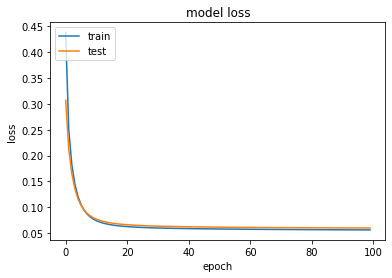

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_182 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_183 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_184 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_185 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 212us/ste

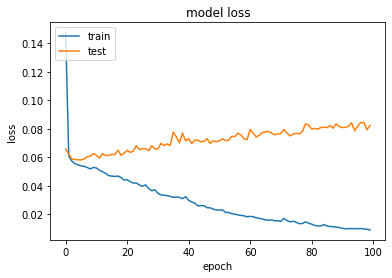

In [63]:
num_outputs = 69
act_func = "tanh"
batch_size = 64
epochs = 100

for opt in optim:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(num_outputs, activation=act_func))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("Optimizer ", opt)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_92 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_93 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_94 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_95 (Dense)             (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 141us/ste

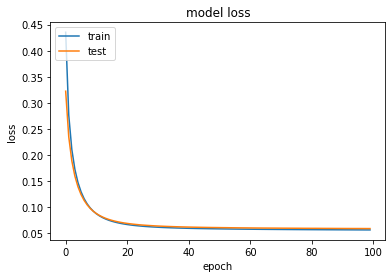

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 200)               141800    
_________________________________________________________________
dense_97 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_98 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_99 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_100 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 206us/ste

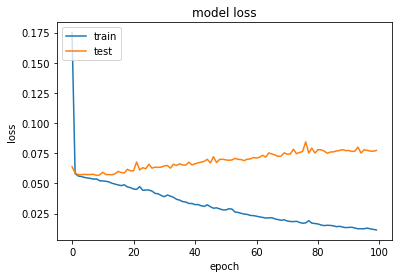

In [44]:
num_outputs = 69
act_func = "tanh"
batch_size = 64
epochs = 100

for opt in optim:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(100, activation=act_func))
    model.add(Dense(num_outputs, activation=act_func))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("Optimizer ", opt)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Different batches

In [47]:
batches = [16, 32, 64, 128]

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_102 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_103 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_104 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_105 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 355us/ste

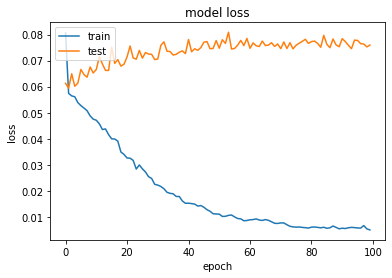

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_107 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_108 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_109 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_110 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 254us/ste

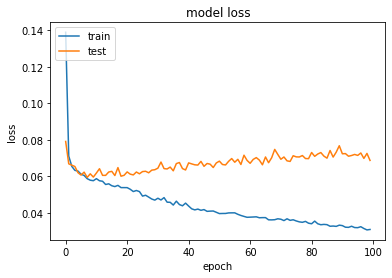

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_112 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_113 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_114 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_115 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 214us/ste

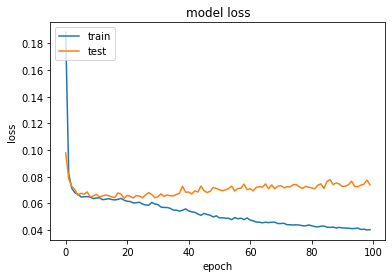

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_117 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_118 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_119 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_120 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 185us/ste

794/794 [==============================] - 0s 40us/step - loss: 0.0461 - val_loss: 0.0637
Epoch 71/100
794/794 [==============================] - 0s 41us/step - loss: 0.0465 - val_loss: 0.0641
Epoch 72/100
794/794 [==============================] - 0s 36us/step - loss: 0.0457 - val_loss: 0.0654
Epoch 73/100
794/794 [==============================] - 0s 38us/step - loss: 0.0452 - val_loss: 0.0626
Epoch 74/100
794/794 [==============================] - 0s 39us/step - loss: 0.0446 - val_loss: 0.0642
Epoch 75/100
794/794 [==============================] - 0s 38us/step - loss: 0.0440 - val_loss: 0.0658
Epoch 76/100
794/794 [==============================] - 0s 35us/step - loss: 0.0453 - val_loss: 0.0640
Epoch 77/100
794/794 [==============================] - 0s 38us/step - loss: 0.0448 - val_loss: 0.0641
Epoch 78/100
794/794 [==============================] - 0s 36us/step - loss: 0.0433 - val_loss: 0.0657
Epoch 79/100
794/794 [==============================] - 0s 43us/step - loss: 0.0436 - 

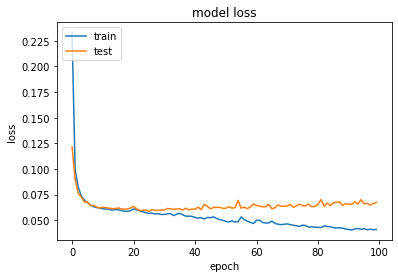

In [46]:
num_outputs = 69
act_func = "tanh"
batch_size = 64
epochs = 100
opt = Adam()

for batch_size in batches:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(num_outputs, activation=act_func))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("batches ", batch_size)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_122 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_123 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_124 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_125 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 354us/ste

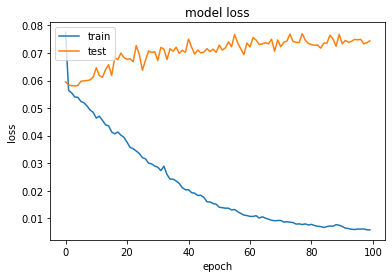

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_127 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_128 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_129 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_130 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 254us/ste

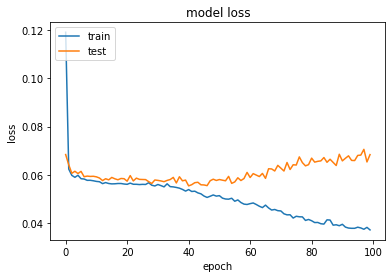

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_132 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_133 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_134 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_135 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 210us/ste

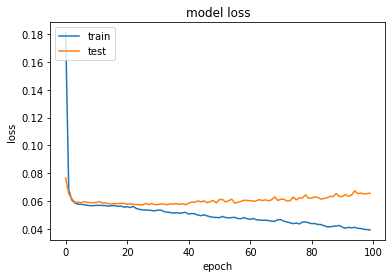

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_137 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_138 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_139 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_140 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 185us/ste

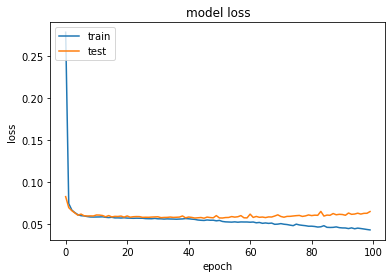

In [48]:
num_outputs = 69
act_func = "tanh"
batch_size = 64
epochs = 100
opt = Adam()

for batch_size in batches:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(200, activation=act_func))
    model.add(Dense(100, activation=act_func))
    model.add(Dense(num_outputs, activation=act_func))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("batches ", batch_size)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

add regularization

In [51]:
regularization = [0.1, 0.01, 0.001, 0.0001]

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_142 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_143 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_144 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_145 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 260us/ste

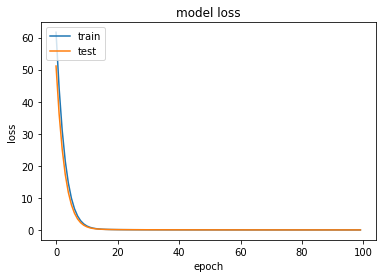

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_147 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_148 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_149 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_150 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 249us/ste

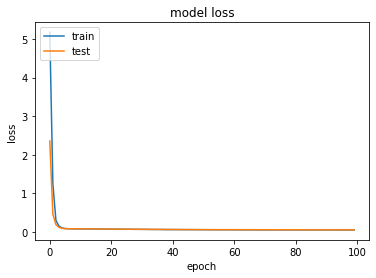

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_152 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_153 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_154 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_155 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 234us/ste

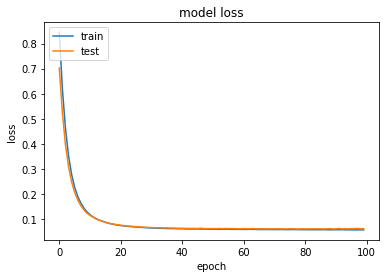

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_157 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_158 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_159 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_160 (Dense)            (None, 69)                13869     
Total params: 276,269
Trainable params: 276,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 249us/ste

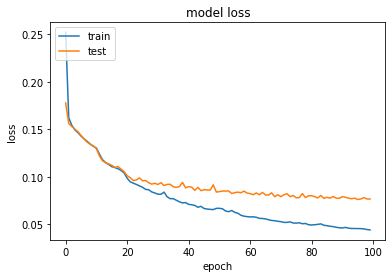

In [50]:
num_outputs = 69
act_func = "tanh"
batch_size = 64
epochs = 100
opt = Adam()

for regul_lr in regularization:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func,kernel_regularizer=regularizers.l2(regul_lr)))
    model.add(Dense(200, activation=act_func,kernel_regularizer=regularizers.l2(regul_lr)))
    model.add(Dense(200, activation=act_func,kernel_regularizer=regularizers.l2(regul_lr)))
    model.add(Dense(num_outputs, activation=act_func, kernel_regularizer=regularizers.l2(regul_lr)))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("regularization ", regul_lr)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_162 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_163 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_164 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_165 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 240us/ste

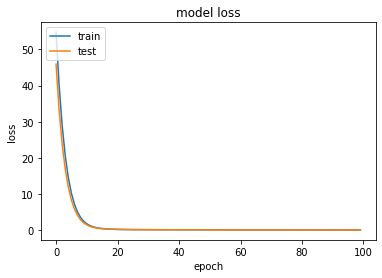

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_167 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_168 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_169 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_170 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 234us/ste

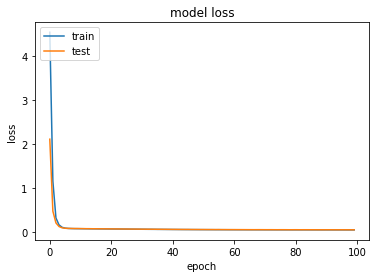

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_172 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_173 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_174 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_175 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 227us/ste

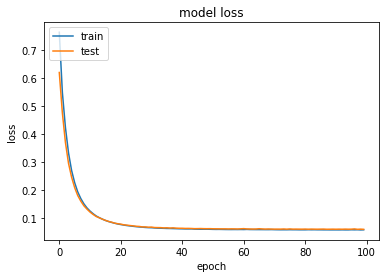

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_177 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_178 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_179 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_180 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 234us/ste

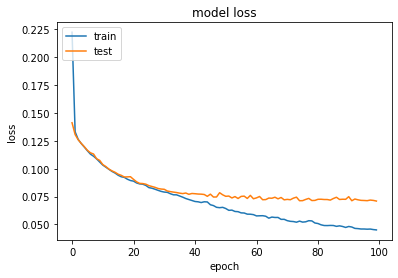

In [52]:
num_outputs = 69
act_func = "tanh"
batch_size = 64
epochs = 100
opt = Adam()

for regul_lr in regularization:
    # 5 Layers   
    model = Sequential()
    model.add(Dense(200, activation=act_func, input_shape=(708,)))
    model.add(Dense(200, activation=act_func,kernel_regularizer=regularizers.l2(regul_lr)))
    model.add(Dense(200, activation=act_func,kernel_regularizer=regularizers.l2(regul_lr)))
    model.add(Dense(100, activation=act_func,kernel_regularizer=regularizers.l2(regul_lr)))
    model.add(Dense(num_outputs, activation=act_func, kernel_regularizer=regularizers.l2(regul_lr)))
    model.summary()
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1, validation_data=(x_test, y_test))
    print("")
    print("regularization ", regul_lr)
    print("------------------------")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)
    #print('Test accuracy:', score[1])
    print(history.history.keys())
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# ORIGINAL CODE

In [59]:
num_outputs = 69
act_func = "tanh"
batch_size = 64
epochs = 100


    
model = Sequential()
model.add(Dense(200, activation=act_func, input_shape=(708,)))
model.add(Dense(200, activation=act_func,kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.2))
model.add(Dense(200, activation=act_func,kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(100, activation=act_func,kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(num_outputs, activation=act_func,kernel_regularizer=regularizers.l2(0.001)))
model.summary()
model.compile(loss='mean_squared_error',optimizer=Adam())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))



Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 200)               141800    
_________________________________________________________________
dense_187 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_188 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_189 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_190 (Dense)            (None, 69)                6969      
Total params: 249,269
Trainable params: 249,269
Non-trainable params: 0
_________________________________________________________________
Train on 794 samples, validate on 200 samples
Epoch 1/100
794/794 [==============================] - 0s 294us/ste

Test loss: 0.06832622706890107
dict_keys(['val_loss', 'loss'])


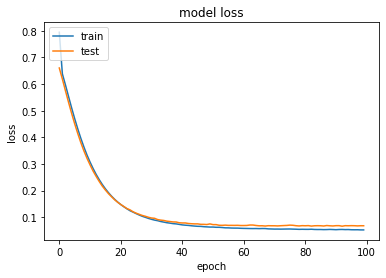

In [60]:

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score)
#print('Test accuracy:', score[1])

print(history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [55]:
#import numpy as np

In [56]:
vindex_lst = list(video_ftrs.index.values)
y_predictions = list()

X_knn = y_data_scld
y_knn = list(audio_ftrs.index.values)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, algorithm = "brute", p=2)
neigh.fit(X_knn, y_knn)

for i in range(10):
    vindex = random.choice(vindex_lst)
    x_val = video_ftrs.loc[vindex].values
    print("input:", metada_ftrs.loc[[vindex],"Url"].values)
    x_val_rshaped = x_val.reshape((1,708))
    x_val_scled = x_scaler.transform(x_val_rshaped)
    y_pr = model.predict(x_val_scled)
    y_predictions.append(y_pr)
    #y_pr_inv_scaled = y_scaler.inverse_transform(y_pr)
    knn_predict = neigh.predict(y_pr)
    print("predict:",metada_ftrs.loc[knn_predict,"Url"].values)
         

input: ['https://www.youtube.com/watch?v=0diCvgWv_ng']
predict: ['https://youtu.be/ouVIyC_YQOg']
input: ['https://www.youtube.com/watch?v=mFqBONrJRJU']
predict: ['https://www.youtube.com/watch?v=qdbrIrFxas0']
input: ['https://www.youtube.com/watch?v=FoKaKlwzK1s']
predict: ['https://www.youtube.com/watch?v=FoKaKlwzK1s']
input: ['https://www.youtube.com/watch?v=cHjt9Q00sp4']
predict: ['https://www.youtube.com/watch?v=cHjt9Q00sp4']
input: ['https://www.youtube.com/watch?v=8syw8mjpgsQ']
predict: ['https://www.youtube.com/watch?v=XQtDFTUm370']
input: ['https://www.youtube.com/watch?v=iX23r272kqg']
predict: ['https://youtu.be/ouVIyC_YQOg']
input: ['https://www.youtube.com/watch?v=q9tMSfC7E38']
predict: ['https://www.youtube.com/watch?v=q9tMSfC7E38']
input: ['https://www.youtube.com/watch?v=uV9iGv4sKNI']
predict: ['https://www.youtube.com/watch?v=uV9iGv4sKNI']
input: ['https://www.youtube.com/watch?v=MK1qkCQ-Jm4']
predict: ['https://www.youtube.com/watch?v=MK1qkCQ-Jm4']
input: ['https://www.y